## Install & Import nessary libries

In [1]:
!nvidia-smi

Mon Jul 17 18:30:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
import spacy
from string import punctuation
from heapq import nlargest

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Define the list of stopwords
stopwords = nlp.Defaults.stop_words.union(punctuation)

In [4]:
#!pip install --upgrade pytorch-lightning

!pip install --upgrade jedi
!pip install --upgrade setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2


In [5]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.0 MB/s eta 0:00:00


In [6]:
! pip install -Uq git+https://github.com/huggingface/transformers.git
! pip install -Uq git+https://github.com/huggingface/accelerate.git
!pip install -q torch_snippets

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from torch_snippets import *
from transformers import (T5Tokenizer,T5ForConditionalGeneration)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14

[07/17/23 18:32:09] WARNING  Unable to load torch and dependent libraries from                ]8;id=406300;file:///usr/local/lib/python3.10/dist-packages/torch_snippets/loader.py\loader.py]8;;\:]8;id=103579;file:///usr/local/lib/python3.10/dist-packages/torch_snippets/loader.py#<module>:98\<module>:98]8;;\
                             torch-snippets.                                                                       
                             Functionalities might be limited. pip install lovely-tensors in                       
                             case there are torch related errors                                                   

In [7]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [8]:
!pip install rouge
from rouge import Rouge
rouge = Rouge()


## Import Dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
train_df = pd.read_csv("/content/drive/MyDrive/Dataset/cnn_dailymail_tokenlen/train.csv", encoding='latin-1')
test_df = pd.read_csv("/content/drive/MyDrive/Dataset/cnn_dailymail_tokenlen/test.csv", encoding='latin-1')
val_df = pd.read_csv("/content/drive/MyDrive/Dataset/cnn_dailymail_tokenlen/validation.csv", encoding='latin-1')

In [11]:
df = pd.concat([train_df, test_df, val_df], ignore_index=True)
df.shape

(311971, 4)

In [12]:
df.head()

,source_text,target_text,source_len,target_len
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",219,40
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,446,42
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",897,74
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,589,55
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,638,69


In [13]:
df['source_text'] = "summarize: " + df['source_text']
df.head()

,source_text,target_text,source_len,target_len
0,summarize: By . Associated Press . PUBLISHED: ...,"Bishop John Folda, of North Dakota, is taking ...",219,40
1,summarize: (CNN) -- Ralph Mata was an internal...,Criminal complaint: Cop used his role to help ...,446,42
2,summarize: A drunk driver who killed a young w...,"Craig Eccleston-Todd, 27, had drunk at least t...",897,74
3,summarize: (CNN) -- With a breezy sweep of his...,Nina dos Santos says Europe must be ready to a...,589,55
4,summarize: Fleetwood are the only team still t...,Fleetwood top of League One after 2-0 win at S...,638,69


<Axes: xlabel='target_len', ylabel='Count'>

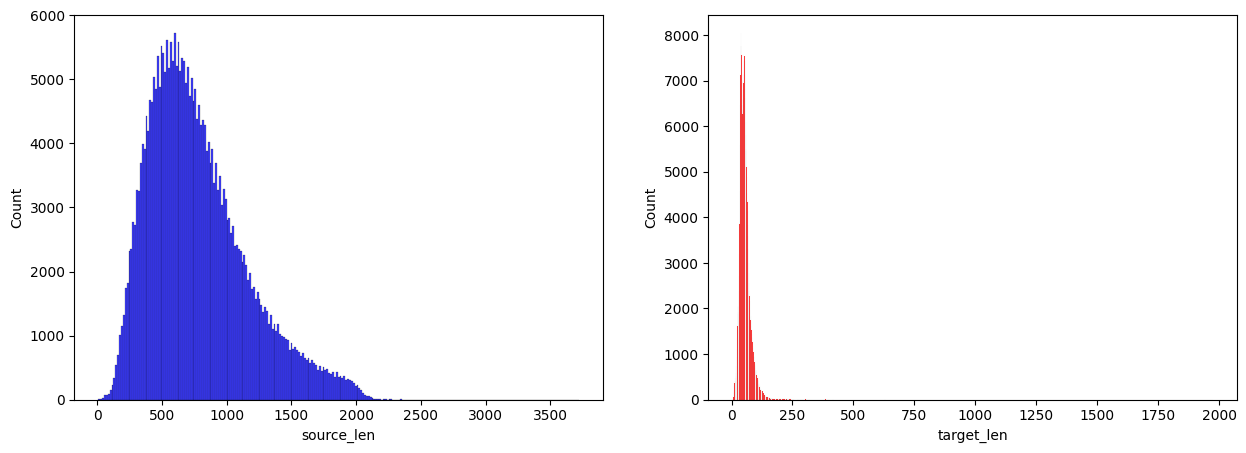

In [14]:
# Plotting the histograms
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(df['source_len'], ax=axes[0], color='blue')
sns.histplot(df['target_len'], ax=axes[1], color='red')

In [15]:
df = df[(df.target_len <= 150) & (df.target_len >= 92)]
df = df[(df.source_len <= 1200) & (df.source_len >= 400)]

In [16]:
df.shape

(11549, 4)

<Axes: xlabel='target_len', ylabel='Count'>

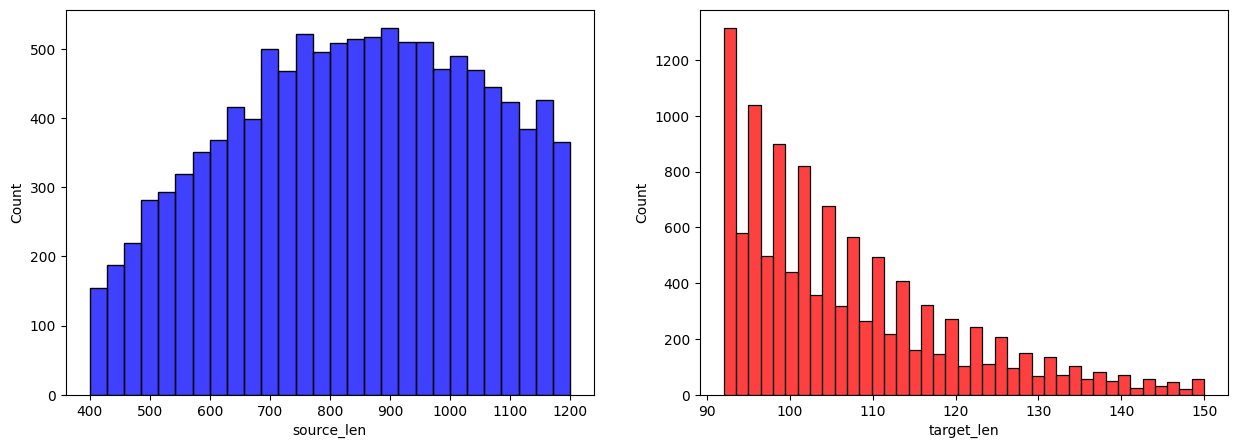

In [17]:

# Plotting the histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(df['source_len'], ax=axes[0], color='blue')
sns.histplot(df['target_len'], ax=axes[1], color='red')

In [18]:
from sklearn.model_selection import train_test_split

def clean_data(df):
    # lowercase the data
    df["source_text"] = df["source_text"].apply(lambda x: x.lower())
    df["target_text"] = df["target_text"].apply(lambda x: x.lower())
    # remove excess white space
    df["source_text"] = df["source_text"].apply(lambda x: " ".join(x.split()))
    return df

df = clean_data(df)

# Step 1: Split the original DataFrame into training and temporary DataFrame (80% for training and 20% temporary)
train_df, temp_df = train_test_split(df, test_size=0.2)

# Step 2: Split the temporary DataFrame into validation and testing DataFrames (50% for validation and 50% for testing)
val_df, test_df = train_test_split(temp_df, test_size=0.5)
train_df.shape, val_df.shape, test_df.shape

((9239, 4), (1155, 4), (1155, 4))

In [19]:
train_df.head()

,source_text,target_text,source_len,target_len
249213,summarize: hedge fund billionaire kenneth grif...,"kenneth griffin, 45, is the founder and ceo of...",689,110
266341,summarize: it's official: katie couric is now ...,"katie couric, 57, tied the knot with financier...",1113,109
242212,summarize: with green spaces being replaced by...,the sea tree concept was designed by dutch-bas...,979,96
168093,summarize: police who investigated a rape comp...,eleanor de freitas killed herself days before ...,961,103
151767,summarize: by . harriet arkell for mailonline ...,controlled explosion carried out in field st a...,1059,115


In [20]:
train_df = pd.DataFrame(train_df[:8000])
val_df = pd.DataFrame(val_df[:1000])
test_df0 = pd.DataFrame(test_df[:1000])

## Create Model

In [21]:
tokenizer = T5Tokenizer.from_pretrained("t5-base")

class ArticleSummaryDataset(Dataset):
    def __init__(self, df, tokenizer):
        self.df = df
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):

        article = df["source_text"].iloc[index]
        summary = df["target_text"].iloc[index]

        source = self.tokenizer.batch_encode_plus(
            [article],
            add_special_tokens=True,
            max_length=512,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors="pt"
        )

        target = self.tokenizer.batch_encode_plus(
            [summary],
            add_special_tokens=True,
            max_length=128,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors="pt"
        )

        article_ids = source['input_ids'].squeeze()
        article_masks = source['attention_mask'].squeeze()
        summary_ids = target['input_ids'].squeeze()
        summary_masks = target['attention_mask'].squeeze()
        return (
            article_ids.to(device, dtype=torch.long),
            article_masks.to(device, dtype=torch.long),
            summary_ids.to(device, dtype=torch.long),
            summary_masks.to(device, dtype=torch.long),
        )

tr_ds = ArticleSummaryDataset(train_df, tokenizer)
val_ds = ArticleSummaryDataset(val_df, tokenizer)

tr_dl = DataLoader(tr_ds, shuffle=True, batch_size=8)
val_dl = DataLoader(val_ds, shuffle=False, batch_size=8)

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:199: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available 

In [22]:
from torch.optim import AdamW
from transformers import AdamW, get_linear_schedule_with_warmup

def train_batch(model, batch, optimizer):
    article_tokens = batch[0].to(device)
    article_masks = batch[1].to(device)
    summary_tokens = batch[2].to(device)
    summary_masks = batch[3].to(device)

    model.train()

    optimizer.zero_grad()

    outputs = model(input_ids=article_tokens,
                   attention_mask=article_masks,
                   labels=summary_tokens,
                   decoder_attention_mask=summary_masks)
    loss, prediction_scores = outputs[:2]

    loss.backward()
    optimizer.step()
    scheduler.step()

    return loss

@torch.no_grad()
def validate_batch(model, batch):
    article_tokens = batch[0].to(device)
    article_masks = batch[1].to(device)
    summary_tokens = batch[2].to(device)
    summary_masks = batch[3].to(device)

    model.eval()

    outputs = model(input_ids=article_tokens,
                   attention_mask=article_masks,
                   labels=summary_tokens,
                   decoder_attention_mask=summary_masks)
    loss, prediction_scores = outputs[:2]
    return loss

num_epochs = 15
model = T5ForConditionalGeneration.from_pretrained("t5-base").to(device)
optimizer = AdamW(model.parameters(), lr=3e-5)
total_steps = len(tr_dl) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)
log = Report(num_epochs)

output_folder = "outputs"
os.makedirs(output_folder, exist_ok=True)



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Train Model

In [23]:
# Initialize lists to store training and validation losses
train_losses = []
val_losses = []

# train the model
for e in range(num_epochs):
    N = len(tr_dl)
    epoch_train_loss = 0.0  # Variable to accumulate the training loss for this epoch
    for i, batch in enumerate(tr_dl):
        loss = train_batch(model, batch, optimizer)
        log.record(e+(i+1)/N, trn_loss=loss, end="\r")
        epoch_train_loss += loss.item()  # Accumulate the training loss for this batch

    # Calculate and store the average training loss for this epoch
    avg_train_loss = epoch_train_loss / len(tr_dl)
    train_losses.append(avg_train_loss)

    N = len(val_dl)
    epoch_val_loss = 0.0  # Variable to accumulate the validation loss for this epoch
    for i, batch in enumerate(val_dl):
        loss = validate_batch(model, batch)
        log.record(e+(i+1)/N, val_loss=loss, end="\r")
        epoch_val_loss += loss.item()  # Accumulate the validation loss for this batch

    # Calculate and store the average validation loss for this epoch
    avg_val_loss = epoch_val_loss / len(val_dl)
    val_losses.append(avg_val_loss)

    log.report_avgs(e+1)

    # Save the model after each epoch
    epoch_output_folder = os.path.join(output_folder, f"epoch_{e+1}")
    os.makedirs(epoch_output_folder, exist_ok=True)
    model_save_path = os.path.join(epoch_output_folder, "model.pt")
    torch.save(model.state_dict(), model_save_path)

EPOCH: 1.000  trn_loss: 1.522  val_loss: 1.220  (470.83s - 6591.60s remaining)
EPOCH: 2.000  trn_loss: 1.409  val_loss: 1.170  (940.97s - 6116.28s remaining)
EPOCH: 3.000  trn_loss: 1.364  val_loss: 1.131  (1411.89s - 5647.54s remaining)
EPOCH: 4.000  trn_loss: 1.330  val_loss: 1.100  (1882.55s - 5177.01s remaining)
EPOCH: 5.000  trn_loss: 1.303  val_loss: 1.073  (2355.12s - 4710.24s remaining)
EPOCH: 6.000  trn_loss: 1.278  val_loss: 1.050  (2830.91s - 4246.37s remaining)
EPOCH: 7.000  trn_loss: 1.258  val_loss: 1.030  (3303.76s - 3775.73s remaining)
EPOCH: 8.000  trn_loss: 1.240  val_loss: 1.011  (3775.42s - 3303.49s remaining)
EPOCH: 9.000  trn_loss: 1.225  val_loss: 0.997  (4248.30s - 2832.20s remaining)
EPOCH: 10.000  trn_loss: 1.211  val_loss: 0.984  (4719.86s - 2359.93s remaining)
EPOCH: 11.000  trn_loss: 1.199  val_loss: 0.973  (5196.37s - 1889.59s remaining)
EPOCH: 12.000  trn_loss: 1.191  val_loss: 0.966  (5668.24s - 1417.06s remaining)
EPOCH: 13.000  trn_loss: 1.184  val_los

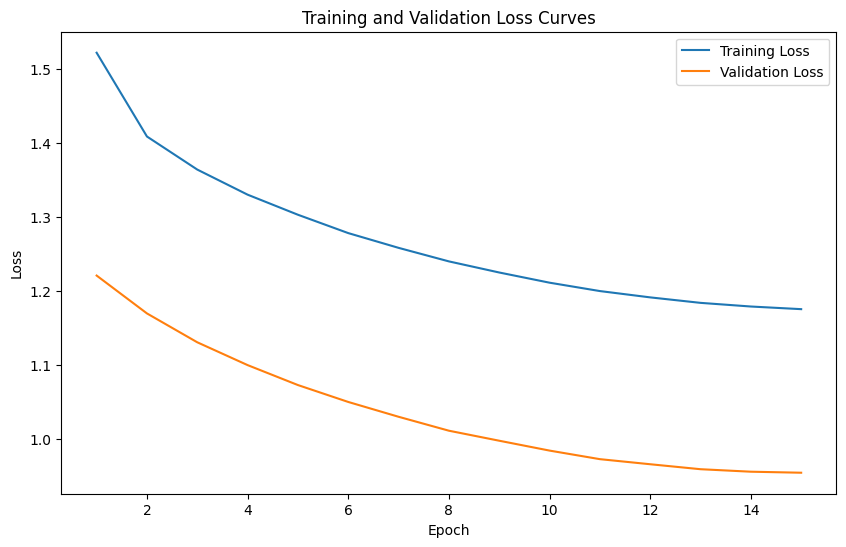

In [24]:
# Visualize the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()
plt.show()

In [41]:
import torch
from transformers import T5ForConditionalGeneration

# Define the path to the saved checkpoint
checkpoint_path = "/content/outputs/epoch_15/model.pt"

# Load the checkpoint and create an instance of T5ForConditionalGeneration
model_state_dict = torch.load(checkpoint_path, map_location=device)
model = T5ForConditionalGeneration.from_pretrained("t5-base")
model.load_state_dict(model_state_dict)

# Move the model to the desired device
model.to(device)



T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

## Evaluate model with test data

### Abstractive Summarization - Use t5 base transformer model summarize in test_df

In [44]:
test_df = test_df0

# Define a function to generate predictions using the loaded model
def generate_prediction(text):
    input_ids = tokenizer.encode(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model.generate(input_ids.to(device), max_length=140, min_length=100, num_return_sequences=1)
    predictions = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return predictions

# Apply the generate_prediction function to the 'source_text' column and store the predictions in a new 'predictions' column
test_df["predictions"] = test_df['source_text'].apply(generate_prediction)

# Save the DataFrame with predictions to a CSV file
test_df.to_csv("test_predictions.csv", index=False)

# Convert the columns to lists
hyps = test_df["predictions"].tolist()
refs = test_df["target_text"].tolist()


# Join elements if they are already in a list
hyps = [' '.join(sentences) if isinstance(sentences, list) else sentences for sentences in hyps]
refs = [' '.join(sentences) if isinstance(sentences, list) else sentences for sentences in refs]

# Calculate the Rouge scores
scores = rouge.get_scores(hyps, refs, avg=True)

<ipython-input-44-2610ecd3442d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["predictions"] = test_df['source_text'].apply(generate_prediction)


In [45]:
# Print the ROUGE scores
print(f"ROUGE-1: {scores['rouge-1']['f']:.4f}")
print(f"ROUGE-2: {scores['rouge-2']['f']:.4f}")
print(f"ROUGE-L: {scores['rouge-l']['f']:.4f}")
print(scores)

ROUGE-1: 0.4643

ROUGE-2: 0.2313

ROUGE-L: 0.4380

{
    'rouge-1': {'r': 0.41700574440110805, 'p': 0.5292112664458601, 'f': 0.46431655523885096},
    'rouge-2': {'r': 0.20863418646962908, 'p': 0.263302117410243, 'f': 0.23134408599676143},
    'rouge-l': {'r': 0.39327358277488444, 'p': 0.4994346154780132, 'f': 0.43802894193391845}
}

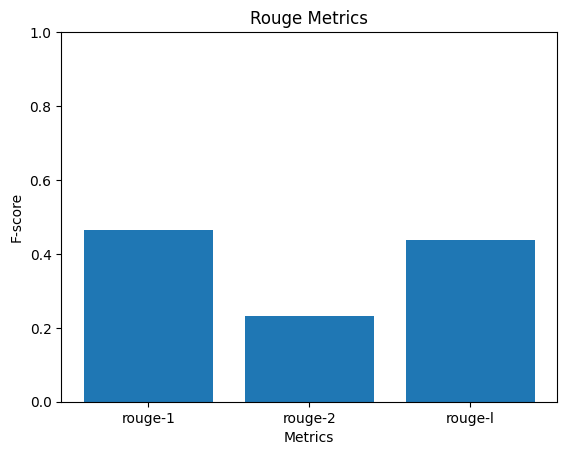

In [46]:
import matplotlib.pyplot as plt
from rouge import Rouge

def plot_rouge_scores(scores):
    metrics = ['rouge-1', 'rouge-2', 'rouge-l']
    scores = [scores['rouge-1']['f'], scores['rouge-2']['f'], scores['rouge-l']['f']]

    plt.bar(metrics, scores)
    plt.ylim([0, 1])  # Set the y-axis limits to ensure consistent scale

    plt.xlabel('Metrics')
    plt.ylabel('F-score')
    plt.title('Rouge Metrics')

    plt.savefig('rouge_metrics.png')
    plt.show()

# Generate the PNG image
plot_rouge_scores(scores)

### Extractive summerization - Sentence ranking with long text inputs

In [48]:
test_df = test_df0

# Function to generate reduced article using extractive summarization
def generate_reduced_article(input_text):
    doc = nlp(input_text)
    tokens = [token.text for token in doc]
    total_tokens = len(doc)
    summary_scale = 128 / total_tokens
    summary_scale = round(summary_scale, 2)
    summarized_text = extractive_summary(input_text, summary_scale, doc)
    return summarized_text

# Function for extractive summarization
def extractive_summary(input_text, summary_scale, doc):
    word_frequencies = {}
    for word in doc:
        if word.text.lower() not in stopwords:
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1

    max_frequency = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = word_frequencies[word] / max_frequency

    sentence_tokens = [sent for sent in doc.sents]

    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent] += word_frequencies[word.text.lower()]

    select_length = int(len(sentence_tokens) * summary_scale)
    summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)

    final_summary = [word.text for word in summary]
    summary = ' '.join(final_summary)

    return summary

# Generate reduced article for each row in test_df
test_df["predictions"] = test_df["source_text"].apply(generate_reduced_article)

from rouge import Rouge
rouge = Rouge()

# Convert the columns to lists
hyps = test_df["predictions"].tolist()
refs = test_df["target_text"].tolist()


# Join elements if they are already in a list
hyps = [' '.join(sentences) if isinstance(sentences, list) else sentences for sentences in hyps]
refs = [' '.join(sentences) if isinstance(sentences, list) else sentences for sentences in refs]

# Calculate the Rouge scores
scores = rouge.get_scores(hyps, refs, avg=True)

<ipython-input-48-7921ec76ced3>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["predictions"] = test_df["source_text"].apply(generate_reduced_article)


In [47]:
# Print the ROUGE scores
print(f"ROUGE-1: {scores['rouge-1']['f']:.4f}")
print(f"ROUGE-2: {scores['rouge-2']['f']:.4f}")
print(f"ROUGE-L: {scores['rouge-l']['f']:.4f}")
print(scores)

ROUGE-1: 0.4643

ROUGE-2: 0.2313

ROUGE-L: 0.4380

{
    'rouge-1': {'r': 0.41700574440110805, 'p': 0.5292112664458601, 'f': 0.46431655523885096},
    'rouge-2': {'r': 0.20863418646962908, 'p': 0.263302117410243, 'f': 0.23134408599676143},
    'rouge-l': {'r': 0.39327358277488444, 'p': 0.4994346154780132, 'f': 0.43802894193391845}
}

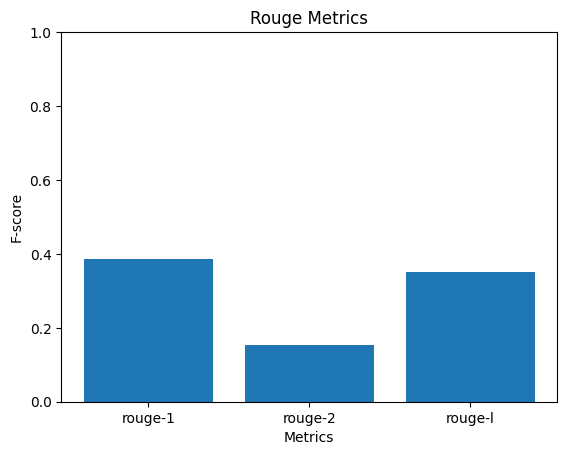

In [49]:
import matplotlib.pyplot as plt
from rouge import Rouge

def plot_rouge_scores(scores):
    metrics = ['rouge-1', 'rouge-2', 'rouge-l']
    scores = [scores['rouge-1']['f'], scores['rouge-2']['f'], scores['rouge-l']['f']]

    plt.bar(metrics, scores)
    plt.ylim([0, 1])  # Set the y-axis limits to ensure consistent scale

    plt.xlabel('Metrics')
    plt.ylabel('F-score')
    plt.title('Rouge Metrics')

    plt.savefig('rouge_metrics.png')
    plt.show()

# Generate the PNG image
plot_rouge_scores(scores)

### we can see that "Abstractive Summarization - Use t5 base transformer" model outperforms "Extractive summerization - Sentence ranking with long text inputs" model in all three ROUGE metrics. Therefore, based on these ROUGE scores, first model is considered better at summarization compared to second one. It achieves higher recall, precision, and F1-scores for each of the ROUGE metrics.

### Mixed strategie either produce an abstractive summary after identifying an extractive intermediate state

In [50]:
test_df = test_df0

# Function to generate reduced article using extractive summarization
def generate_reduced_article(input_text):
    doc = nlp(input_text)
    tokens = [token.text for token in doc]
    total_tokens = len(doc)
    summary_scale = 360 / total_tokens
    summary_scale = round(summary_scale, 2)
    if total_tokens < 512:
        summarized_text = input_text
    else:
        summarized_text = extractive_summary(input_text, summary_scale, doc)
    return summarized_text

# Function for extractive summarization
def extractive_summary(input_text, summary_scale, doc):
    word_frequencies = {}
    for word in doc:
        if word.text.lower() not in stopwords:
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1

    max_frequency = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = word_frequencies[word] / max_frequency

    sentence_tokens = [sent for sent in doc.sents]

    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent] += word_frequencies[word.text.lower()]

    select_length = int(len(sentence_tokens) * summary_scale)
    summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)

    final_summary = [word.text for word in summary]
    summary = ' '.join(final_summary)

    return summary

In [51]:
# Generate reduced article for each row in test_df
test_df["reduced_article"] = test_df["source_text"].apply(generate_reduced_article)

<ipython-input-51-9940743a64d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["reduced_article"] = test_df["source_text"].apply(generate_reduced_article)


In [52]:
test_df['reduced_article_len'] = test_df['reduced_article'].apply(lambda x: len(nltk.word_tokenize(x)))
test_df

<ipython-input-52-e6c2d30fe18e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['reduced_article_len'] = test_df['reduced_article'].apply(lambda x: len(nltk.word_tokenize(x)))


,source_text,target_text,source_len,target_len,predictions,reduced_article,reduced_article_len
301706,"summarize: claims: aleksandar kovacic, picture...",aleksandar kovacic suffered serious injuries i...,856,93,aleksandar kovacic suffered serious injuries a...,'could not be believed' a senior judge ruled m...,382
64689,"summarize: caroline foxley, pictured yesterday...","caroline foxley, 59, was convicted of falsely ...",789,124,"mother-of-two deposited cash from â£306,000 pr...",ã¢ââit would appear it has still got a bit o...,470
80149,summarize: by . ashley collman . published: . ...,"titan lee-hai, 19, jumped 15 stories into the ...",953,131,"titan lee-hai, 19, jumped 15 stories to his de...",19-year-old new york university freshman titan...,539
8657,"summarize: dejan lovren, the croatian player a...",dejan lovren has blasted referee yuichi nishim...,651,93,dejan lovren fumes at yuichi nishimura's decis...,"summarize: dejan lovren, the croatian player a...",455
272815,summarize: there's a word to describe moments ...,london's newest tourist attraction provides a ...,967,110,glass walkway opened yesterday between the nor...,up high: the glass platform stretches across t...,427
...,...,...,...,...,...,...,...
83681,summarize: by . alex greig . published: . 11:2...,janitor hired for $8 an hour stayed on at care...,714,96,"miguel alvarez, 33, stayed at the valley sprin...",stepping up: most of the staff at the valley s...,535
56008,summarize: by . sara malm . published: . 06:06...,boy took delta flight from minneapolis to las ...,825,96,the nine-year-old boy who made it past securit...,the boy's parents told minneapolis police they...,520
276955,summarize: these are the shocking injuries suf...,dawn marmoy called 999 after she was beaten by...,772,106,dawn marmoy was beaten by her husband michael ...,the images captured on a police officer's body...,415
174,summarize: the heartbroken former fiancãâ©e o...,"scot young, 52, fell 60ft to his death from ã...",1078,107,"mr young, 52, found impaled on metal railings ...","noelle reno, 31, joined his daughters scarlet,...",435


In [53]:
# Define a function to generate predictions using the loaded model
def generate_prediction(text):
    input_ids = tokenizer.encode(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model.generate(input_ids.to(device), max_length=140, min_length=100, num_return_sequences=1)
    predictions = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return predictions

# Apply the generate_prediction function to the 'source_text' column and store the predictions in a new 'predictions' column
test_df["predictions"] = test_df['reduced_article'].apply(generate_prediction)

# Save the DataFrame with predictions to a CSV file
test_df.to_csv("test_predictions.csv", index=False)

# Convert the columns to lists
hyps = test_df["predictions"].tolist()
refs = test_df["target_text"].tolist()


# Join elements if they are already in a list
hyps = [' '.join(sentences) if isinstance(sentences, list) else sentences for sentences in hyps]
refs = [' '.join(sentences) if isinstance(sentences, list) else sentences for sentences in refs]

# Calculate the Rouge scores
scores = rouge.get_scores(hyps, refs, avg=True)

<ipython-input-53-25d0586a3272>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["predictions"] = test_df['reduced_article'].apply(generate_prediction)


In [54]:
# Print the ROUGE scores
print(f"ROUGE-1: {scores['rouge-1']['f']:.4f}")
print(f"ROUGE-2: {scores['rouge-2']['f']:.4f}")
print(f"ROUGE-L: {scores['rouge-l']['f']:.4f}")
print(scores)

ROUGE-1: 0.4192

ROUGE-2: 0.1846

ROUGE-L: 0.3921

{
    'rouge-1': {'r': 0.37231507987577556, 'p': 0.48669444039088816, 'f': 0.4192381238476296},
    'rouge-2': {'r': 0.16447168602664355, 'p': 0.21430172290187383, 'f': 0.1846173993334714},
    'rouge-l': {'r': 0.34802077222034034, 'p': 0.45567397750385313, 'f': 0.3921447647319349}
}

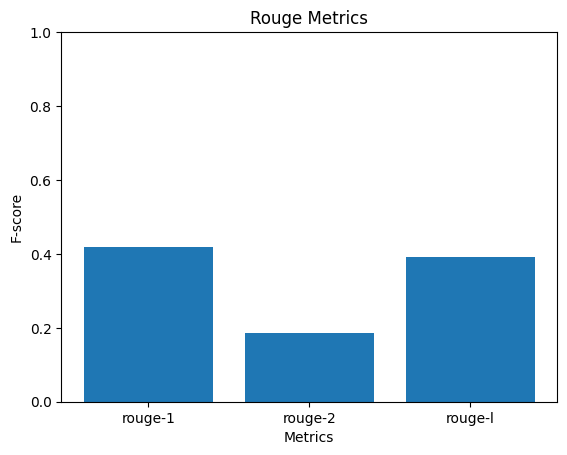

In [55]:
import matplotlib.pyplot as plt
from rouge import Rouge

def plot_rouge_scores(scores):
    metrics = ['rouge-1', 'rouge-2', 'rouge-l']
    scores = [scores['rouge-1']['f'], scores['rouge-2']['f'], scores['rouge-l']['f']]

    plt.bar(metrics, scores)
    plt.ylim([0, 1])  # Set the y-axis limits to ensure consistent scale

    plt.xlabel('Metrics')
    plt.ylabel('F-score')
    plt.title('Rouge Metrics')

    plt.savefig('rouge_metrics.png')
    plt.show()

# Generate the PNG image
plot_rouge_scores(scores)

## Inference the Model

In [ ]:
text="""So it took off exactly at the beginning of the window and it's the last Ariane 5. So it's the end of an era of 27 years of quite a successful launcher, probably the best launcher during a quarter of a century. But now the rules of the games are changing probably because it's the last one. And we're expecting a new Ariane 6, which is not ready to fly. Can you just fill us in on what the Ariane program's been about? Because not everybody's as sort of up to date on these matters as certainly you are. I imagine primarily about bringing satellites into space. Initially, Ariane 5 was dedicated to try to have some manned launch, to launch astronauts from Europe. Then they gave up because the little program called Hermes was too expensive. So we had the Ariane 5, which was being built. And so it was a kind of super Ferrari to launch satellites. At the beginning, it didn't work, it had a failure, but then it became a very reliable launcher, very good commercially. Then there was not too much competition. So it was very reliable, was making good money, and the customers were very happy. It is fantastic to see behind you as you're talking to us, the rocket going up into space. Because very often with these things, we hear things get delayed. Why is that such a sensitive issue? Why does that happen, Fred? The delays are not an issue. The issue is when there is an explosion, you lose your whole mission. Clearly, that is very serious. But it's sort of, I mean, I know extremely little about this and you're an expert. When you've got a rocket that is so expensive, that is so massive and secure, why does the weather play such a part in whether it takes off or not? Because it's very sensitive and, for example, it should have been launched 24 hours ago, but there was some wind at high altitudes. So when you have high altitude winds, it can disrupt your trajectory and put the rocket at stake. So it's a very fragile thing. It's a kind of controlled explosion where things can go wrong very quickly and you have only one chance. It's not like your car where you can drive it, even if there is a small, several failures there, you lose the mission. Indeed. And obviously, safety is prime order, as they say. Sorry, that's a French word, isn't it, primordial. It's the most important thing, I think, the most important thing. Can I just sort of ask you, we've had sort of the Ariane 5, there's going to be an Ariane 6. Where does it develop from here? What are the ambitions for this programme? So even if Ariane 5 were extremely successful, quickly, about six, seven years ago, the markets have changed and they saw that it was too expensive. Even with two satellites on board, this launcher was too expensive. So they had to do something more efficient with Ariane 6 to try to cut the cost by at least 40 percent. Unfortunately, this Ariane 6 has a lot of delays, three years of delay, and the backup rockets, smaller rockets are not available. The Russian Soyuz is stuck because of the war in Ukraine. It cannot be launched from French Guiana. And the smaller rocket, Vega C, Italian made, has a failure and it's not it's not working right now. So hopefully next year, at least the Vega C and Ariane 6 should be ready to go and to start again the business and to give the autonomy of Europe to launch its own satellite. Right now, last week, Europe and European Space Agency had to launch with the main competitor SpaceX from Cape Canaveral. OK, so if Ariane 6 can't be sort of accelerated and brought online as quickly as possible, what are the possible consequences of that? How will it affect us? It affects extremely because a lot of satellites are waiting. For example, Galileo is a big network constellation of satellites, but you need new satellites. There is Copernicus, which is a European also network for climate and weather. They need some satellites are waiting. Even military people from different countries like France want to launch and there is no rocket available. So in that case, when it becomes urgent, you go and you buy from the competitor, which makes the thing even worse."""


In [39]:
text = "summarize:" + text

def generate_prediction(text):
    max_length = 512  # Maximum length of the input text

    # Generate the summary for the entire input text
    input_ids = tokenizer.encode(text, return_tensors="pt", truncation=True, max_length=max_length)
    outputs = model.generate(input_ids.to(device), max_length=128, min_length=100, num_return_sequences=1)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

print(generate_prediction(text))


the last Ariane 5 launched at the beginning of the window. it was a reliable launcher, very good commercially. the 
weather plays a huge part in whether the rocket takes off. it's a very fragile thing, and if it explodes, you lose 
your whole mission. it's not like your car where you can drive it, but it's a very fragile thing. it's not like a 
car where you can drive it, but it's a very good launcher. it's not ready to fly